**Import libraries**

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Read in corrupted & full data files as data frames** &
**Use .info() method to get initial overview of data frames**

In [134]:
corrupted_data = pd.read_excel('corrupted_file.xlsx')


In [135]:
corrupted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 68 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Procurement Notice ID                             31 non-null     object 
 1   Award Notice Url                                  31 non-null     object 
 2   Data source                                       31 non-null     object 
 3   Date Published                                    31 non-null     object 
 4   Date Awarded                                      30 non-null     object 
 5   Contracting Authority                             31 non-null     object 
 6   Supplier                                          30 non-null     object 
 7   Total Contract Value - Low (GBP)                  23 non-null     object 
 8   Total Contract Value - High (GBP)                 23 non-null     object 
 9   Total Award Value (GBP)

In [136]:
full_data = pd.read_excel('full_data.xlsx')

In [137]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1802 entries, 0 to 1801
Data columns (total 68 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Procurement Notice ID                             1802 non-null   object 
 1   Award Notice Url                                  1802 non-null   object 
 2   Data source                                       1802 non-null   object 
 3   Date Published                                    1802 non-null   object 
 4   Date Awarded                                      1383 non-null   object 
 5   Contracting Authority                             1802 non-null   object 
 6   Supplier                                          1757 non-null   object 
 7   Total Contract Value - Low (GBP)                  1624 non-null   object 
 8   Total Contract Value - High (GBP)                 1624 non-null   object 
 9   Total Award Value (

**Comparing the 'Award per Value Supplier (GBP)' columns from both sheets**

In [138]:
merged_data = pd.merge(corrupted_data, full_data, on='Procurement Notice ID', suffixes=('_corrupted', '_full'))
merged_data['is_value_correct'] = merged_data['Award Value per Supplier (GBP)_corrupted'] == merged_data['Award Value per Supplier (GBP)_full']


**Calculating percentage of correct rows and rounding to one decimal**

In [261]:
correct_count = merged_data['is_value_correct'].sum()
total_count = len(merged_data)
percentage_correct = (correct_count / total_count)*100
percentage_correct = round(percentage_correct, 1)

print(f"The percentage rows that has the correct 'award value per supplier'datapoint in the corrupted sheet is: {percentage_correct}%")

The percentage rows that has the correct 'award value per supplier'datapoint in the corrupted sheet is: 70.3%


# 1.a. Answer: 70.3%

In [140]:
full_data['Award Value per Supplier (GBP)']

0       £460,206,503
1         £5,153,846
2         £5,153,846
3         £5,153,846
4         £5,153,846
            ...     
1797             NaN
1798             NaN
1799             NaN
1800             NaN
1801             NaN
Name: Award Value per Supplier (GBP), Length: 1802, dtype: object

**Clean data** (remove '£' & ',')

**Check head**

In [141]:
full_data['Award Value per Supplier (GBP)'] = full_data['Award Value per Supplier (GBP)'].str.replace('[^0-9]','')

/var/folders/s8/dyf3rgsx7yn3crrm370n_hd40000gn/T/ipykernel_50684/1493655816.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  full_data['Award Value per Supplier (GBP)'] = full_data['Award Value per Supplier (GBP)'].str.replace('[^0-9]','')


In [142]:
full_data['Award Value per Supplier (GBP)'].head()

0    460206503
1      5153846
2      5153846
3      5153846
4      5153846
Name: Award Value per Supplier (GBP), dtype: object

In [143]:
corrupted_data['Award Value per Supplier (GBP)'] = corrupted_data['Award Value per Supplier (GBP)'].str.replace('[^0-9]','')

/var/folders/s8/dyf3rgsx7yn3crrm370n_hd40000gn/T/ipykernel_50684/3152637697.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  corrupted_data['Award Value per Supplier (GBP)'] = corrupted_data['Award Value per Supplier (GBP)'].str.replace('[^0-9]','')


In [144]:
corrupted_data['Award Value per Supplier (GBP)'].head()

0    460206503
1     38400000
2     32512336
3     31467809
4     28675050
Name: Award Value per Supplier (GBP), dtype: object

**Change Datatype from Object to Int for calculations**

In [145]:
full_data['Award Value per Supplier (GBP)'] = full_data['Award Value per Supplier (GBP)'].astype('Int64')

In [146]:
corrupted_data['Award Value per Supplier (GBP)'] = corrupted_data['Award Value per Supplier (GBP)'].astype('Int64')

**Use .sum() method to count the total value of the 'Award Value per Supplier (GBP)' column** &
**Compare the Sum from the sheet to the total_sum_corrupted**

In [147]:
total_sum_full = full_data['Award Value per Supplier (GBP)'].sum()
print(total_sum_full)

1726161911


In [148]:
total_sum_corrupted = corrupted_data['Award Value per Supplier (GBP)'].sum()
print(total_sum_corrupted)

634667694


In [149]:
print(634667695-total_sum_corrupted)

1


# 1.b.i. £634,667,694

# 1.b.ii. No
    
# 1.b.iii. £1

In [150]:
corrupted_data['Contract End Date']

0              26/02/2027
1              30/09/2027
2     2024-04-09 00:00:00
3              18/05/2026
4                     NaN
5     2022-07-08 00:00:00
6              15/05/2025
7              25/05/2025
8              25/05/2025
9              25/05/2025
10             31/07/2024
11             31/05/2023
12             31/03/2026
13                    NaN
14                    NaN
15             31/03/2024
16                    NaN
17                    NaN
18             30/08/2023
19    2025-02-05 00:00:00
20             31/12/2022
21             30/03/2023
22                    NaN
23             29/08/2022
24             31/03/2025
25             21/07/2025
26             31/12/2022
27             28/03/2024
28             31/10/2021
29    2023-03-05 00:00:00
30                    NaN
Name: Contract End Date, dtype: object

**Cleanse data: normalize the data**

In [166]:
corrupted_data['Contract End Date'] = pd.to_datetime(corrupted_data['Contract End Date'])

print(corrupted_data['Contract End Date'])

0    2027-02-26
1    2027-09-30
2    2024-09-04
3    2026-05-18
4           NaT
5    2022-08-07
6    2025-05-15
7    2025-05-25
8    2025-05-25
9    2025-05-25
10   2024-07-31
11   2023-05-31
12   2026-03-31
13          NaT
14          NaT
15   2024-03-31
16          NaT
17          NaT
18   2023-08-30
19   2025-05-02
20   2022-12-31
21   2023-03-30
22          NaT
23   2022-08-29
24   2025-03-31
25   2025-07-21
26   2022-12-31
27   2024-03-28
28   2021-10-31
29   2023-05-03
30          NaT
Name: Contract End Date, dtype: datetime64[ns]


/var/folders/s8/dyf3rgsx7yn3crrm370n_hd40000gn/T/ipykernel_50684/986996441.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  corrupted_data['Contract End Date'] = pd.to_datetime(corrupted_data['Contract End Date'])


In [172]:
full_data['Contract End Date'] = pd.to_datetime(full_data['Contract End Date'])

print(full_data['Contract End Date'])

0      2027-02-26
1      2023-12-29
2      2023-12-29
3      2023-12-29
4      2023-12-29
          ...    
1797   2027-06-30
1798   2027-05-30
1799          NaT
1800          NaT
1801          NaT
Name: Contract End Date, Length: 1802, dtype: datetime64[ns]


/var/folders/s8/dyf3rgsx7yn3crrm370n_hd40000gn/T/ipykernel_50684/1505030664.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  full_data['Contract End Date'] = pd.to_datetime(full_data['Contract End Date'])


**Comparing 'Contract end date' columns in both sheets**

In [173]:
contracts_end_date_merged = pd.merge(corrupted_data, full_data, on='Procurement Notice ID', suffixes=('_corrupted', '_full'))
contracts_end_date_merged['is_value_correct'] = contracts_end_date_merged['Contract End Date_corrupted'] == contracts_end_date_merged['Contract End Date_full']


**Calculating percentage of correct rows and rounding to one decimal**

In [174]:
correct_count = contracts_end_date_clean['is_value_correct'].sum()
total_count = len(merged_data)
percentage_correct = (correct_count / total_count)*100
percentage_correct = round(percentage_correct, 1)

print(f"The percentage rows that has the correct 'End to date' datapoint in the corrupted sheet is: {percentage_correct}%")

The percentage rows that has the correct 'End to date' datapoint in the corrupted sheet is: 73.0%


# 2.a. 73%

**Filter out all contracts that end in 2024 & contract type is 'Services'** & **count how many**

In [175]:
full_data['Contract End Date'].head()

0   2027-02-26
1   2023-12-29
2   2023-12-29
3   2023-12-29
4   2023-12-29
Name: Contract End Date, dtype: datetime64[ns]

In [176]:
contract_end_date_filtered = full_data[(full_data['Contract End Date'].dt.year == 2024) & (full_data['Contract Type']=='Services')]

In [177]:
count = len(contract_end_date_filtered)

In [178]:
print(f"The number of 'services' contracts that end in 2024 is {count}")

The number of 'services' contracts that end in 2024 is 120


# 2.b.i. 120 'services' contracts will end in 2024

**Compare both sheets on 'Procurement Notice ID', 'Contract End Date' & 'Award Value per Supplier (GBP)' and save the incorrect Contract End Dates to a new df & use the .sum() to get the total of that column in the new df**

**If sum > 0 then the corrupted sheet can not be correct**

In [180]:
merged_df = pd.merge(full_data[['Procurement Notice ID', 'Contract End Date', 'Award Value per Supplier (GBP)']], 
                     corrupted_data[['Procurement Notice ID', 'Contract End Date', 'Award Value per Supplier (GBP)']], 
                     on='Procurement Notice ID', 
                     suffixes=('_original', '_corrupted'))

In [181]:
incorrect_end_date_df = merged_df[merged_df['Contract End Date_original'] != merged_df['Contract End Date_corrupted']]

In [182]:
sum_overlooked_award_value = incorrect_end_date_df['Award Value per Supplier (GBP)_corrupted'].sum()

In [183]:
sum_overlooked_award_value

72659536

# 2.b.ii. No, the corrupted sheet is not correct. 
# 2.b.iii. The sum of award value per supplier that was overlooked is £72,659,536

**Check for duplicates, missing values, Data type inconsistensies** 

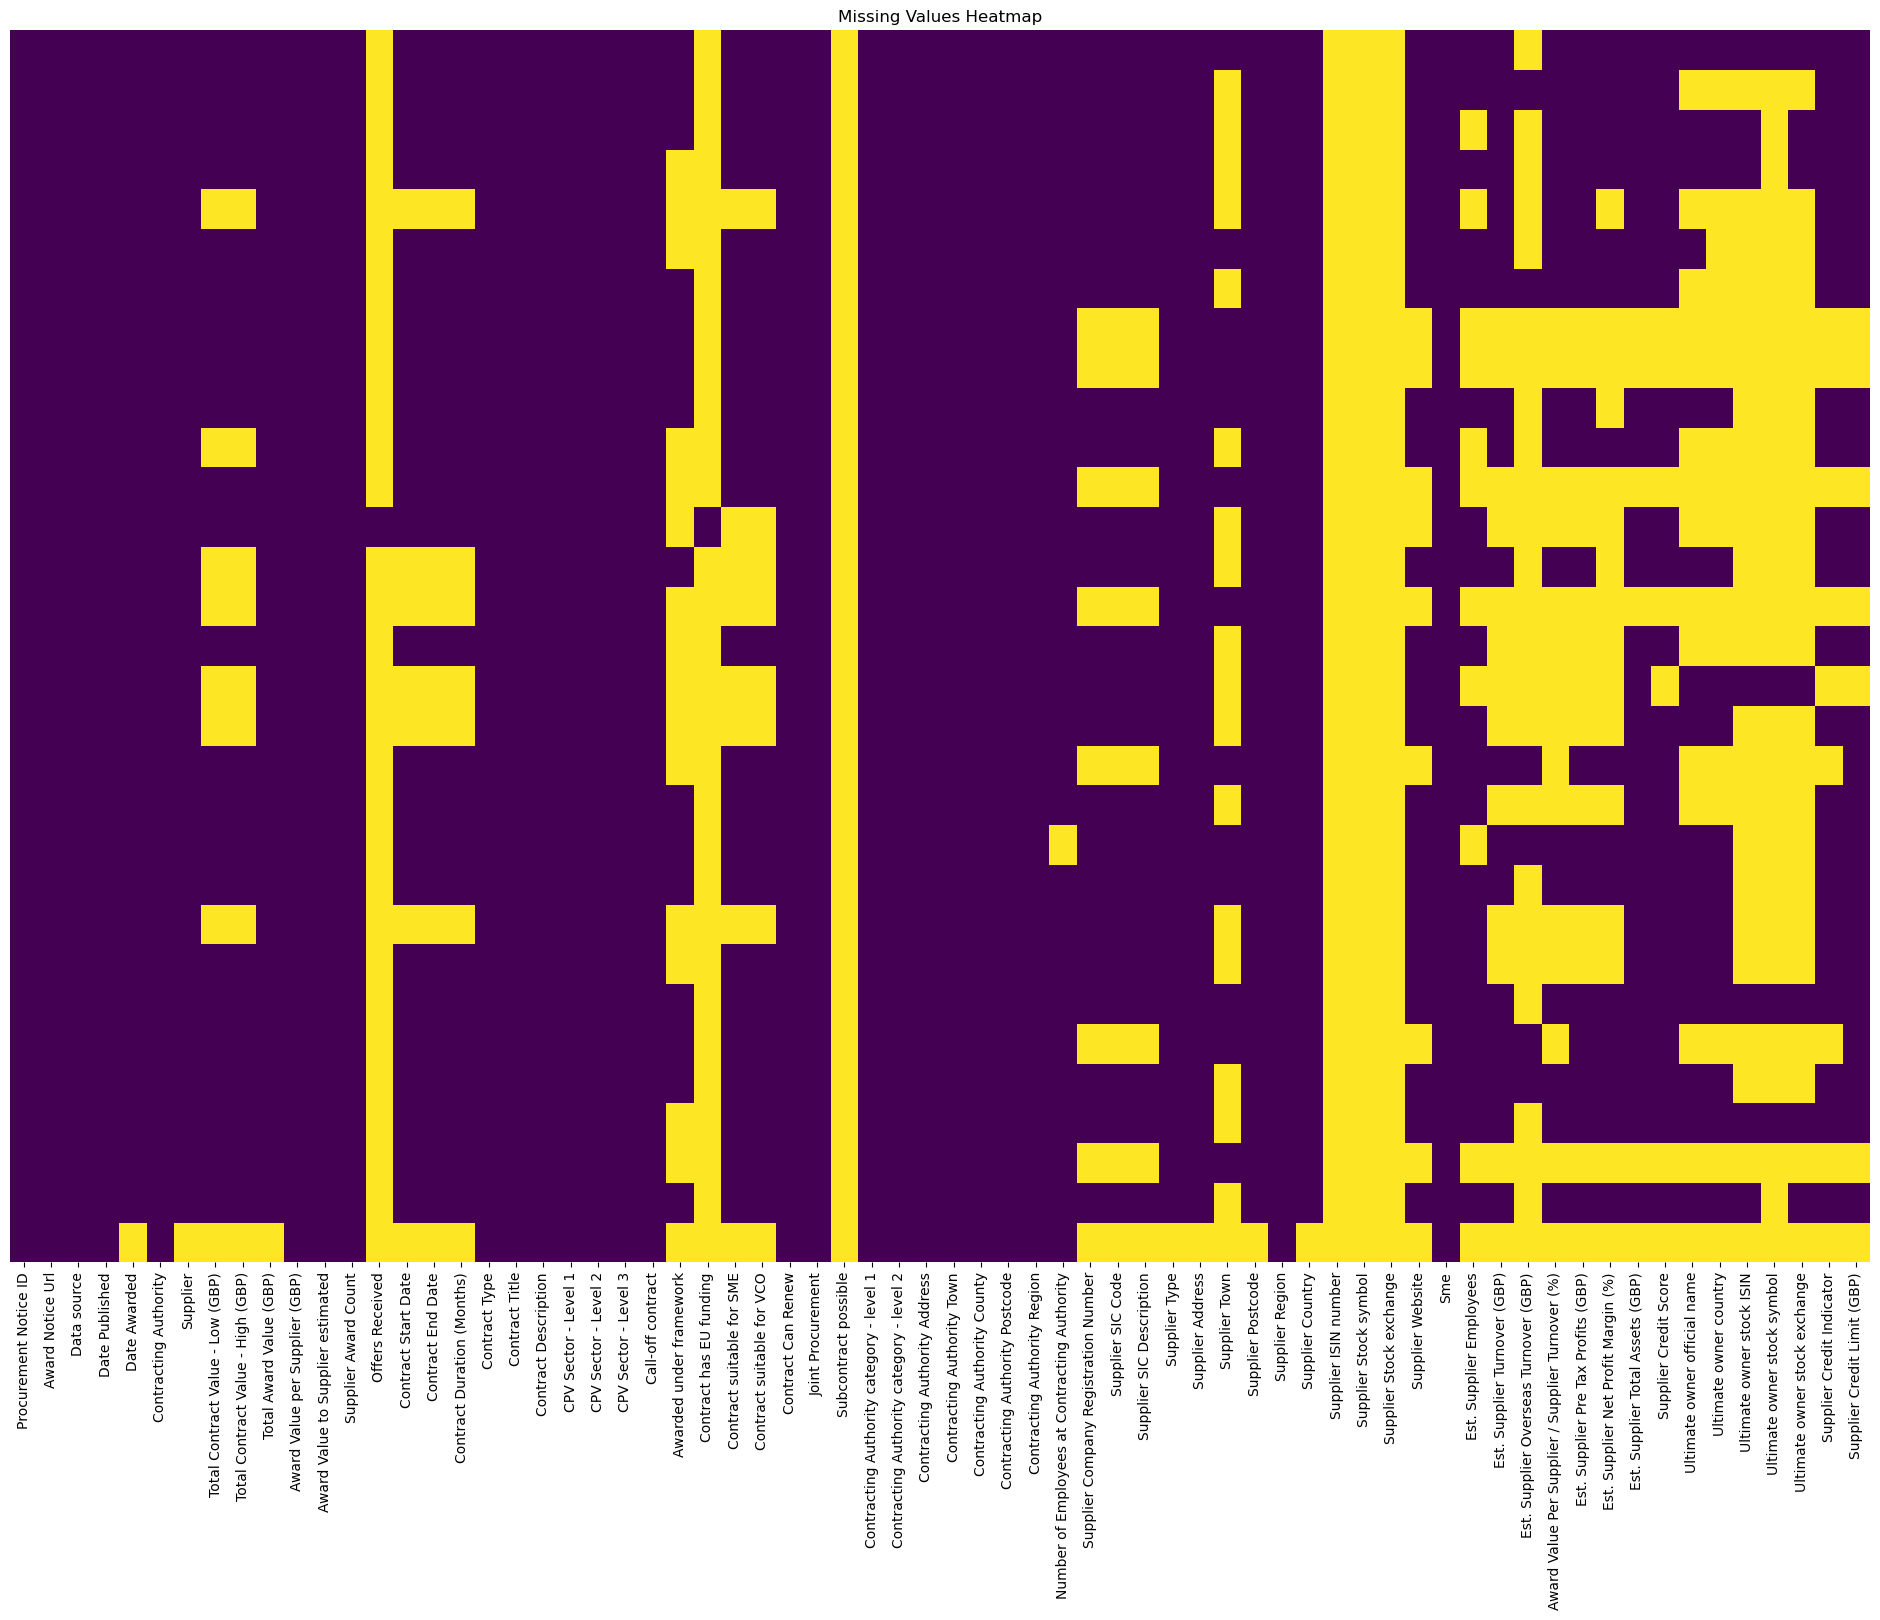

In [263]:
plt.figure(figsize=(24, 16))
sns.heatmap(corrupted_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

**Visualisation of all the missing values in the corrupted sheet**

**To have a further look into specific values, print missing values per column**

In [191]:
missing_values_count = corrupted_data.isnull().sum()

In [198]:
print("Number of missing values in each column:")
print(missing_values_count.to_string())

Number of missing values in each column:
Procurement Notice ID                                0
Award Notice Url                                     0
Data source                                          0
Date Published                                       0
Date Awarded                                         1
Contracting Authority                                0
Supplier                                             1
Total Contract Value - Low (GBP)                     8
Total Contract Value - High (GBP)                    8
Total Award Value (GBP)                              1
Award Value per Supplier (GBP)                       0
Award Value to Supplier estimated                    0
Supplier Award Count                                 0
Offers Received                                     30
Contract Start Date                                  7
Contract End Date                                    7
Contract Duration (Months)                           7
Contract Type           

**Saving this to a new df 'missing_values_df' to have a clear overview**

In [247]:
missing_values_df = missing_values_count.reset_index()
missing_values_df.columns = ['Column Name', 'Missing Values Count']
missing_values_df['Remarks'] = None


**Create a function that returns the unique data types per column**

In [199]:
def check_multiple_dtypes(column):
    unique_dtypes = set(column.map(type))
    return unique_dtypes

**Iterate over the returned values and add them to a dictionary**

In [200]:
multiple_dtypes_columns = {}
for col in corrupted_data.columns:
    unique_dtypes = check_multiple_dtypes(corrupted_data[col])
    if len(unique_dtypes) > 1:
        multiple_dtypes_columns[col] = unique_dtypes       

**Format the returned dictionary in a way that is easily readable**

In [202]:
print("Columns with multiple data types:")
for col, dtypes in multiple_dtypes_columns.items():
    formatted_dtypes = ', '.join([str(dtype) for dtype in dtypes])
    print(f"  - {col}: {formatted_dtypes}")

Columns with multiple data types:
  - Date Published: <class 'str'>, <class 'datetime.datetime'>
  - Date Awarded: <class 'str'>, <class 'float'>, <class 'datetime.datetime'>
  - Supplier: <class 'str'>, <class 'float'>
  - Total Contract Value - Low (GBP): <class 'str'>, <class 'float'>
  - Total Contract Value - High (GBP): <class 'str'>, <class 'float'>
  - Total Award Value (GBP): <class 'str'>, <class 'float'>
  - Contract Start Date: <class 'str'>, <class 'float'>, <class 'datetime.datetime'>
  - Contract End Date: <class 'pandas._libs.tslibs.nattype.NaTType'>, <class 'pandas._libs.tslibs.timestamps.Timestamp'>
  - CPV Sector - Level 3: <class 'str'>, <class 'int'>
  - Awarded under framework: <class 'str'>, <class 'float'>
  - Number of Employees at Contracting Authority: <class 'str'>, <class 'float'>
  - Supplier Company Registration Number: <class 'str'>, <class 'int'>, <class 'float'>
  - Supplier SIC Description: <class 'str'>, <class 'float'>
  - Supplier Type: <class 'str

**Check out columns individually and normalize if necessary**

In [265]:
# Repeat for each column
corrupted_data['Date Published']  # df['column_name']

0     2022-01-06 00:00:00
1              27/05/2022
2              31/05/2022
3              31/05/2022
4              27/05/2022
5              29/05/2022
6              30/05/2022
7              31/05/2022
8              31/05/2022
9              31/05/2022
10             27/05/2022
11    2022-01-06 00:00:00
12             31/05/2022
13    2022-01-06 00:00:00
14    2022-02-06 00:00:00
15    2022-01-06 00:00:00
16    2022-01-06 00:00:00
17             31/05/2022
18             30/05/2022
19             27/05/2022
20             27/05/2022
21             30/05/2022
22    2022-01-06 00:00:00
23    2022-01-06 00:00:00
24             31/05/2022
25             31/05/2022
26             31/05/2022
27    2022-01-06 00:00:00
28             31/05/2022
29    2022-01-06 00:00:00
30    2022-01-06 00:00:00
Name: Date Published, dtype: object

**Check for duplicate rows**

In [245]:
duplicates = corrupted_data.duplicated()

In [246]:
print(duplicates)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
dtype: bool


No duplicates on row level

**Adding 'Remarks' column to the missing_values_df & populating it with remarks, based on my earlier findings**

**The Dataframe is sent in a seperate sheet**

In [257]:
missing_values_df['Remarks'] = None
missing_values_df.loc[missing_values_df['Column Name'] == 'Date published', 'Remarks'] = 'Data should be formatted as dates'

In [258]:
missing_values_df.loc[missing_values_df['Column Name'] == 'Date Awarded', 'Remarks'] = 'Data should be formatted as dates'

In [259]:
missing_values_df.loc[missing_values_df['Column Name'] == 'Total Contract Value - Low (GBP)', 'Remarks'] = 'Need to normalise data for calculations (take away ‘,’ & ‘£’ & turn into numerical values)'
missing_values_df.loc[missing_values_df['Column Name'] == 'Total Contract Value - High (GBP)', 'Remarks'] = 'Need to normalise data for calculations (take away ‘,’ & ‘£’ & turn into numerical values)'
missing_values_df.loc[missing_values_df['Column Name'] == 'Total Award Value (GBP)', 'Remarks'] = 'Need to normalise data for calculations (take away ‘,’ & ‘£’ & turn into numerical values)'
missing_values_df.loc[missing_values_df['Column Name'] == 'Contract Start Date', 'Remarks'] = 'Data should be formatted as dates'
missing_values_df.loc[missing_values_df['Column Name'] == 'Contract End Date', 'Remarks'] = 'Data should be formatted as dates'
missing_values_df.loc[missing_values_df['Column Name'] == 'Subcontract possible', 'Remarks'] = 'Empty Column'
missing_values_df.loc[missing_values_df['Column Name'] == 'Supplier ISIN number', 'Remarks'] = 'Empty Column'
missing_values_df.loc[missing_values_df['Column Name'] == 'Supplier Stock symbol', 'Remarks'] = 'Empty Column'
missing_values_df.loc[missing_values_df['Column Name'] == 'Supplier Stock exchange', 'Remarks'] = 'Empty Column'
missing_values_df.loc[missing_values_df['Column Name'] == 'Est. Supplier Turnover (GBP)', 'Remarks'] = 'Need to normalise data for calculations (take away ‘,’ & ‘£’ & turn into numerical values)'
missing_values_df.loc[missing_values_df['Column Name'] == 'Est. Supplier Overseas Turnover (GBP)', 'Remarks'] = 'Need to normalise data for calculations (take away ‘,’ & ‘£’ & turn into numerical values)'
missing_values_df.loc[missing_values_df['Column Name'] == 'Est. Supplier Pre Tax Profits (GBP)', 'Remarks'] = 'Need to normalise data for calculations (take away ‘,’ & ‘£’ & turn into numerical values)'
missing_values_df.loc[missing_values_df['Column Name'] == 'Est. Supplier Total Assets', 'Remarks'] = 'Need to normalise data for calculations (take away ‘,’ & ‘£’ & turn into numerical values)'
missing_values_df.loc[missing_values_df['Column Name'] == 'Ultimate owner country', 'Remarks'] = 'make sure country names are in the same format for filtering'
missing_values_df.loc[missing_values_df['Column Name'] == 'Supplier Credit Limit (GBP)', 'Remarks'] = 'need to normalise data for calculations (take away ‘,’ & ‘£’ & turn into numerical values)'

**Converting df to .xlsx file**

In [260]:
missing_values_df.to_excel('missing_values_count.xlsx', index=False)